In [34]:
import math
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential


In [35]:
yf.pdr_override()

In [36]:
df = pdr.get_data_yahoo('AAPL', start='2012-09-01', end='2023-10-10')

[*********************100%%**********************]  1 of 1 completed


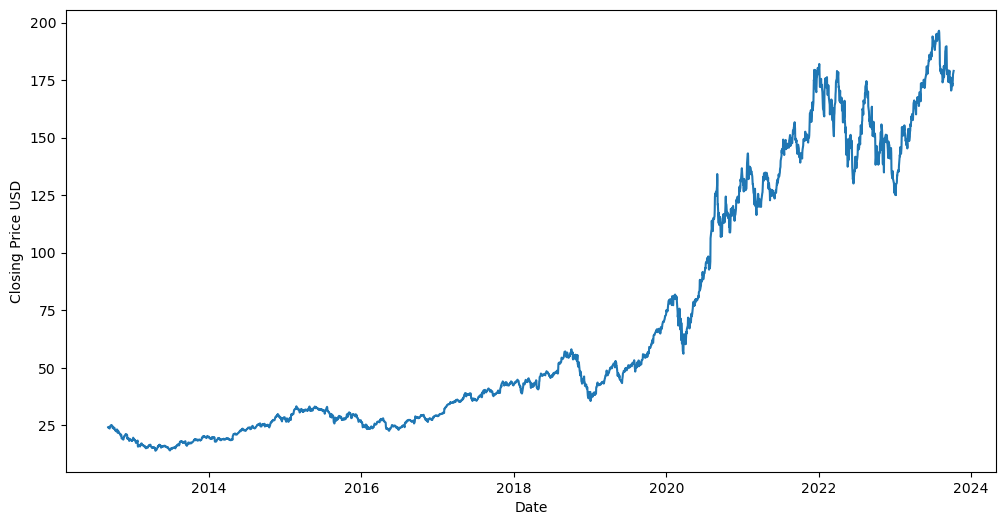

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price USD')
plt.show()

In [38]:
data = df.filter(['Close'])
dataset = data.values


In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [40]:
# Determine the length of the training data
training_data_len = math.ceil(len(dataset) * 0.8)


In [41]:
# Split data into training and validation sets
valid_data_len = 60  # Set the length of sequences for the validation data
train_data = scaled_data[:-valid_data_len]
valid_data = scaled_data[-valid_data_len:]



In [42]:
valid_data = scaler.transform(valid_data)

In [43]:
# Prepare the training data
x_train, y_train = [], []


In [44]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [46]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))



In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [48]:
model.fit(x_train, y_train, batch_size=100, epochs=400)

Epoch 1/400
27/27 [==============================] - 1s 2ms/step - loss: 0.0412
Epoch 2/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 4/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 5/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 6/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 7/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 8/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 9/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 10/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 11/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 12/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 13/400
27/27 [=================

27/27 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 103/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 104/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 105/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 106/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 107/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 108/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 109/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 110/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 111/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 112/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 113/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 114/400
27/27 [=========

27/27 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 203/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 204/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 205/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 206/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 207/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 208/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 209/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 210/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 211/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 212/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 213/400
27/27 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 214/400
27/27 [=========

27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 303/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 304/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 305/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 306/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 307/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 308/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 309/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 310/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 311/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 312/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 313/400
27/27 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 314/400
27/27 [=========

In [49]:
model.save('future_fnn2_model.h5')

In [50]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 1ms/step


In [52]:
# Calculate RMSE
y_test = dataset[training_data_len:, :]
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.889294263739441


In [53]:
# Prepare data for plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Admin\AppData\Local\Temp\ipykernel_3752\765742506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


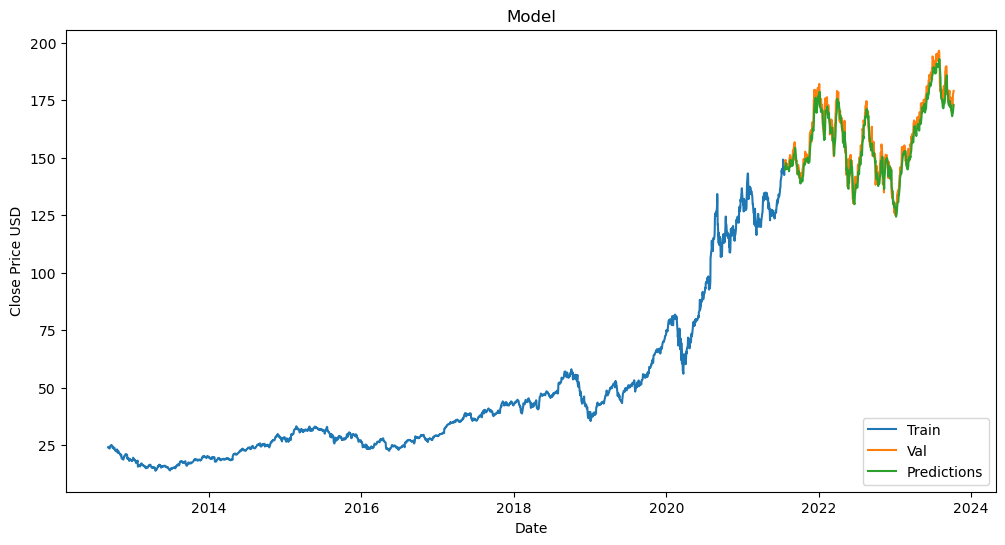

In [54]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
seed_sequence = valid_data[-60:].reshape(1, -1, 1)
n_future_predictions = 5  # Specify the number of future predictions
future_predictions = []

for _ in range(n_future_predictions):
    next_value = model.predict(seed_sequence)[0][0]
    future_predictions.append(next_value)

1/1 [==============================] - 0s 19ms/step


In [56]:
seed_sequence = np.concatenate((seed_sequence[:, 1:], np.array([[[next_value]]])), axis=1)


In [57]:
# Convert future_predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [58]:
future_dates = pd.date_range(start=df.index[-1], periods=n_future_predictions + 1, closed='right')


C:\Users\Admin\AppData\Local\Temp\ipykernel_3752\3491305474.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df.index[-1], periods=n_future_predictions + 1, closed='right')


In [59]:
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Price'])

In [60]:
combined_df = pd.concat([valid, future_df])

In [61]:
print(combined_df)

                 Close  Predictions  Predicted Price
2021-07-22  146.800003   144.741241              NaN
2021-07-23  148.559998   145.318893              NaN
2021-07-26  148.990005   146.816147              NaN
2021-07-27  146.770004   147.541473              NaN
2021-07-28  144.979996   146.775345              NaN
...                ...          ...              ...
2023-10-10         NaN          NaN         0.956823
2023-10-11         NaN          NaN         0.956823
2023-10-12         NaN          NaN         0.956823
2023-10-13         NaN          NaN         0.956823
2023-10-14         NaN          NaN         0.956823

[563 rows x 3 columns]
